The 3 key questions here:


* What are the four most important features that influence salary?

* What's the most suitable regression and classification models to predict player salary? How well do the models work?

* Any suggestions? 

In [1]:
# Importing required packages
import pandas as pd
from pandas import DataFrame
import numpy as np

# Defining the dataset's new name in this project.
salary_file_path = '/content/datasets_70724_149430_2017-18_NBA_salary.csv'
salary_data = pd.read_csv(salary_file_path)

In [2]:
# Make copy to always have access to original data

copy_data = salary_data.copy()

In [3]:
# Look for any missing, null values
# Because if there is we must adjust to avoid negative impact on model

null_values_col = copy_data.isnull().sum()
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head()

,variable,number of missing
0,TOV%,2
1,FTr,2
2,3PAr,2
3,TS%,2


In [4]:
# Will use media for each column to fill N/A values. It will not be influened by outliers.

def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

fillWithMedian(copy_data)

In [5]:
# Great, there are now no null values

copy_data.isnull().any()

Player             False
Salary             False
NBA_Country        False
NBA_DraftNumber    False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                False
3PAr               False
FTr                False
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%               False
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool

In [6]:
# Reading data

copy_data.head(10)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,0.075,0.555,13.6,25.2,19.3,11.0,1.8,2.8,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3


In [7]:
# Let's see all columns in dataset

copy_data.columns

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

***Descriptive statistics*** are brief ***descriptive*** coefficients that summarize a given data set, which can be either a representation of the entire or a sample of a population. ***Descriptive statistics*** are broken down into measures of central tendency and measures of variability (spread).

Measures of central tendency include the ***mean, median,*** and ***mode***, while measures of variability include the ***standard deviation, variance, the minimum and maximum variables, and the kurtosis and skewness.***

In [13]:
copy_data.describe()

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,6.636507e+06,29.451546,26.263918,50.167010,1154.142268,13.260825,0.535427,0.337419,0.263270,4.873814,14.950722,9.908247,12.947835,1.529485,1.713196,13.137732,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,0.598763
std,7.392602e+06,21.125760,4.272297,24.874872,811.357419,8.769280,0.112121,0.226425,0.293976,4.582810,6.847530,4.956436,9.112408,0.989562,1.683792,6.102780,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,1.245653
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000
25%,1.471382e+06,11.000000,23.000000,29.000000,381.000000,9.800000,0.506000,0.167000,0.155000,1.800000,10.200000,6.200000,6.900000,1.000000,0.600000,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,-0.100000
50%,3.202217e+06,25.000000,26.000000,59.000000,1134.000000,13.200000,0.545000,0.346000,0.231000,3.200000,14.000000,8.700000,9.900000,1.500000,1.200000,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,0.100000
75%,1.000000e+07,47.000000,29.000000,71.000000,1819.000000,16.500000,0.582000,0.480000,0.319000,7.000000,18.800000,13.300000,17.600000,1.900000,2.200000,15.700000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,0.900000
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,37.600000,26.500000,49.400000,12.500000,13.400000,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


Text(0, 0.5, 'Frequency')

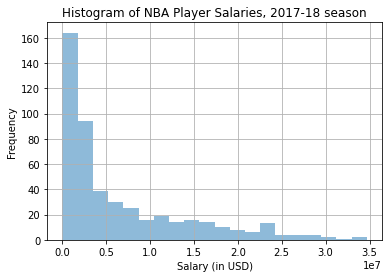

In [16]:
# Matplotlib provides visualisation

import matplotlib.pyplot as plt

copy_data.Salary.hist(bins=20, alpha=0.5, grid=True)
plt.title("Histogram of NBA Player Salaries, 2017-18 season")
plt.xlabel("Salary (in USD)")
plt.ylabel("Frequency")

In order to select appropriate features for prediction, an independent t-test can be applied to calculate whether a feature is significant enough. Here we choose "Country" as our feature.


* H0: There is no significant difference of salaries between players from USA and not.

* H1: There is significant difference of salaries between players from USA and not.

* (when alpha level = .05, two-tailed test)

If |t-statistics| < |t-critical|, we retain the null hypothesis. Conversely, we reject the null. In this case, the |t-statistics| = 0.7033 which is smaller than |t-critical|, then we prefer to think that there is no significant difference of salaries between players from USA and overseas.

In [17]:
# Extracting two columns: Salary and NBA_Country.
# sample variance - Why does Bessel's correction use N-1?
# https://en.wikipedia.org/wiki/Bessel%27s_correction#Proof_of_correctness_-_Alternate_3

# covariance
# https://blog.csdn.net/guomutian911/article/details/43317019

inf_data = pd.read_csv(salary_file_path,usecols=[2,1])
inf_data.head(10)

,Salary,NBA_Country
0,815615,China
1,3477600,Georgia
2,12307692,USA
3,3202217,USA
4,3057240,USA
5,1312611,USA
6,74159,USA
7,46080,Canada
8,12016854,USA
9,1435750,Spain


In [18]:
usa_data = inf_data[inf_data['NBA_Country'] == 'USA']
non_usa_data = inf_data[inf_data['NBA_Country'] != 'USA']
u_data = usa_data[['Salary']] 
n_data = non_usa_data[['Salary']]

In [19]:
u_mean = u_data.mean()
n_mean = n_data.mean()
u_stdev = u_data.std()
n_stdev = n_data.std()
u_count = u_data.count()
n_count = n_data.count()
degree_of_freedom = u_count + n_count - 2

In [20]:
standard_error = (u_stdev**2/u_count + n_stdev**2/n_count)**0.5
t_statistics = (u_mean - n_mean)/standard_error
print('the t-statistics is: {}'.format(t_statistics))
print('the degree of freedom is: {}'.format(degree_of_freedom))

the t-statistics is: Salary   -0.703287
dtype: float64
the degree of freedom is: Salary    483
dtype: int64


***Bayes Theorem*** is the fundamental concept of ***probability***. Here we can apply it to answer the question such as “what is the probability that players’ salaries are higher than $10 million, given that the player is from USA?”

In [21]:
# Bayes Theorem

usa_list = u_data['Salary'].values.tolist()
non_usa_list = n_data['Salary'].values.tolist()

usa_count = u_data['Salary'].count()
non_usa_count = n_data['Salary'].count()

usa_10m_count = 0
non_usa_10m_count = 0

for i in usa_list:
    if i > 10000000:
        usa_10m_count += 1

for i in non_usa_list:
    if i > 10000000:
        non_usa_10m_count += 1

# P(a|b) = (P(b|a))*P(a)/P(b)

probability = (usa_10m_count/(usa_10m_count+non_usa_10m_count)) * ((usa_10m_count + non_usa_10m_count)/
               (usa_count + non_usa_count)) / (usa_count/(usa_count + non_usa_count))
print(probability)

0.23262032085561493


***Probability Distribution*** can make it clear to realize the feature of our variables. Continuing the "Country" problem, a ***Bernoulli Distribution*** can be applied to see the difference between these two groups.

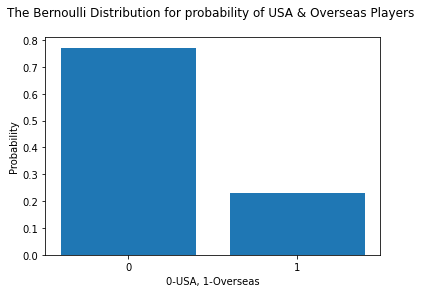

In [24]:
# Bernoulli distribution

u_country = usa_data[['NBA_Country']] 
n_country = non_usa_data[['NBA_Country']]
bernoulli_count = [int(u_country.count()), int(n_country.count())]
u_probability = bernoulli_count[0]/(bernoulli_count[0] + bernoulli_count[1])
n_probability = bernoulli_count[1]/(bernoulli_count[0] + bernoulli_count[1])

# Define the dataset
probability = [u_probability, n_probability]
bars = ('0', '1')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, probability)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.title("The Bernoulli Distribution for probability of USA & Overseas Players \n")
plt.xlabel("0-USA, 1-Overseas")
plt.ylabel("Probability")
plt.show()

Also, players’ age is one of the most important issues in NBA, for a player can earn more if he can play longer. Since it's a discrete value, we can build a probability mass function with age.

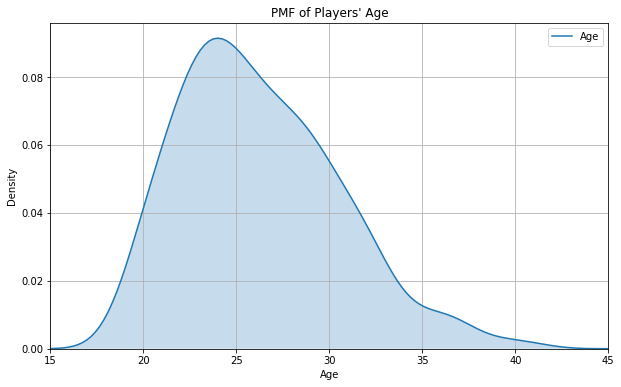

In [26]:
# probability mass function, S-total = 1
# When variables are continous, it becomes Probability Denstiy Function.

import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(copy_data.Age, shade=True)
plt.xlim((15,45))
plt.title("PMF of Players' Age")
plt.ylabel("Density")
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [27]:
# Feature Engineering
# Selecting Features

print(copy_data.columns)

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')


In [28]:
# Creating Features
# buiding binary categories in order to make classifications prediction
# normal-0, star-1

conditions = [
    (copy_data['Salary'] < 10000000)]
choices = [0]
copy_data['Binary'] = np.select(conditions, choices, default=1)
copy_data.head(10)

# copy_data.drop(['USA/NOT'], axis=1, inplace=True)

# Then we build nomial categories
# 0 - edge players
# 1 - normal players
# 2 - all stars
# 3 - superstars

conditions = [
        (copy_data['Salary'] < 5000000),
        (copy_data['Salary'] <= 10000000),
        (copy_data['Salary'] <= 20000000)]
choices = [0, 1, 2]
copy_data['Nominal'] = np.select(conditions, choices, default=3)
copy_data.head(10)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Binary,Nominal
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,0,0
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0,0
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,1,2
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,0,0
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,0,0
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6,0,0
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0,0,0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3,0,0
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5,1,2
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,0.075,0.555,13.6,25.2,19.3,11.0,1.8,2.8,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3,0,0


0    363
1    122
Name: Binary, dtype: int64


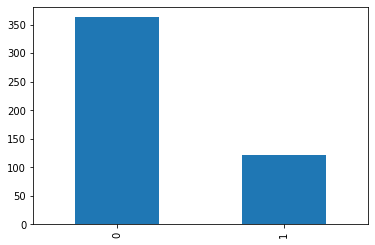

In [31]:
color_wheel = {0: "#008a73", 
               1: "#8a0c00"}
colors = copy_data['Binary'].map(lambda x: color_wheel.get(x))
print(copy_data.Binary.value_counts())
p=copy_data.Binary.value_counts().plot(kind="bar")

0    288
2     80
1     78
3     39
Name: Nominal, dtype: int64


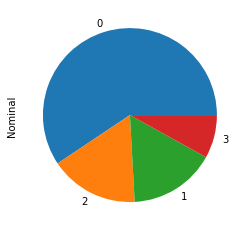

In [32]:
colors = copy_data['Nominal'].map(lambda x: color_wheel.get(x))
print(copy_data.Nominal.value_counts())
p=copy_data.Nominal.value_counts().plot(kind="pie")

In order to choose features that are correlated to our target variables, the **Pearson's R-Square Correlation** can be applied to choose top 8 features that are most correlated to the salaries.

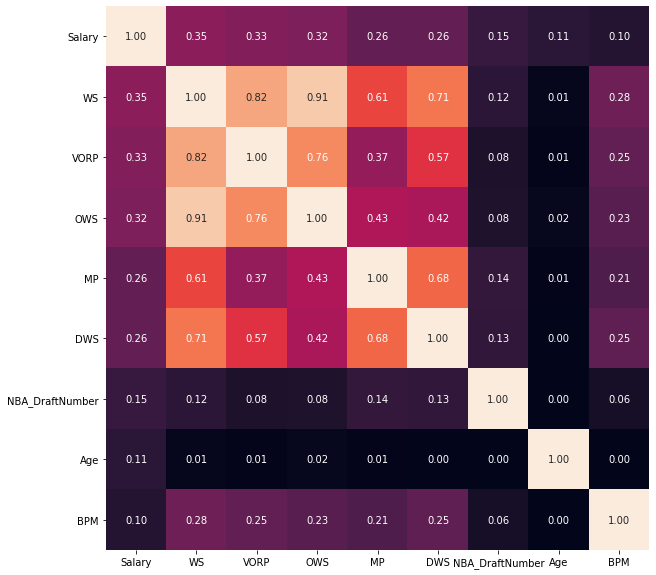

In [33]:
df = DataFrame(copy_data,columns=['Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'])

'''
pandas.DataFrame.corr
method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

min_periods : int, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation
'''

corrmat = df.corr(method='pearson', min_periods=1)
r_square = corrmat ** 2

## Top 8 correlated variables
k = 9 #number of variables for heatmap
cols = r_square.nlargest(k, 'Salary')['Salary'].index
cm = df[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [34]:
cm_square.columns

Index(['Salary', 'WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age',
       'BPM'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


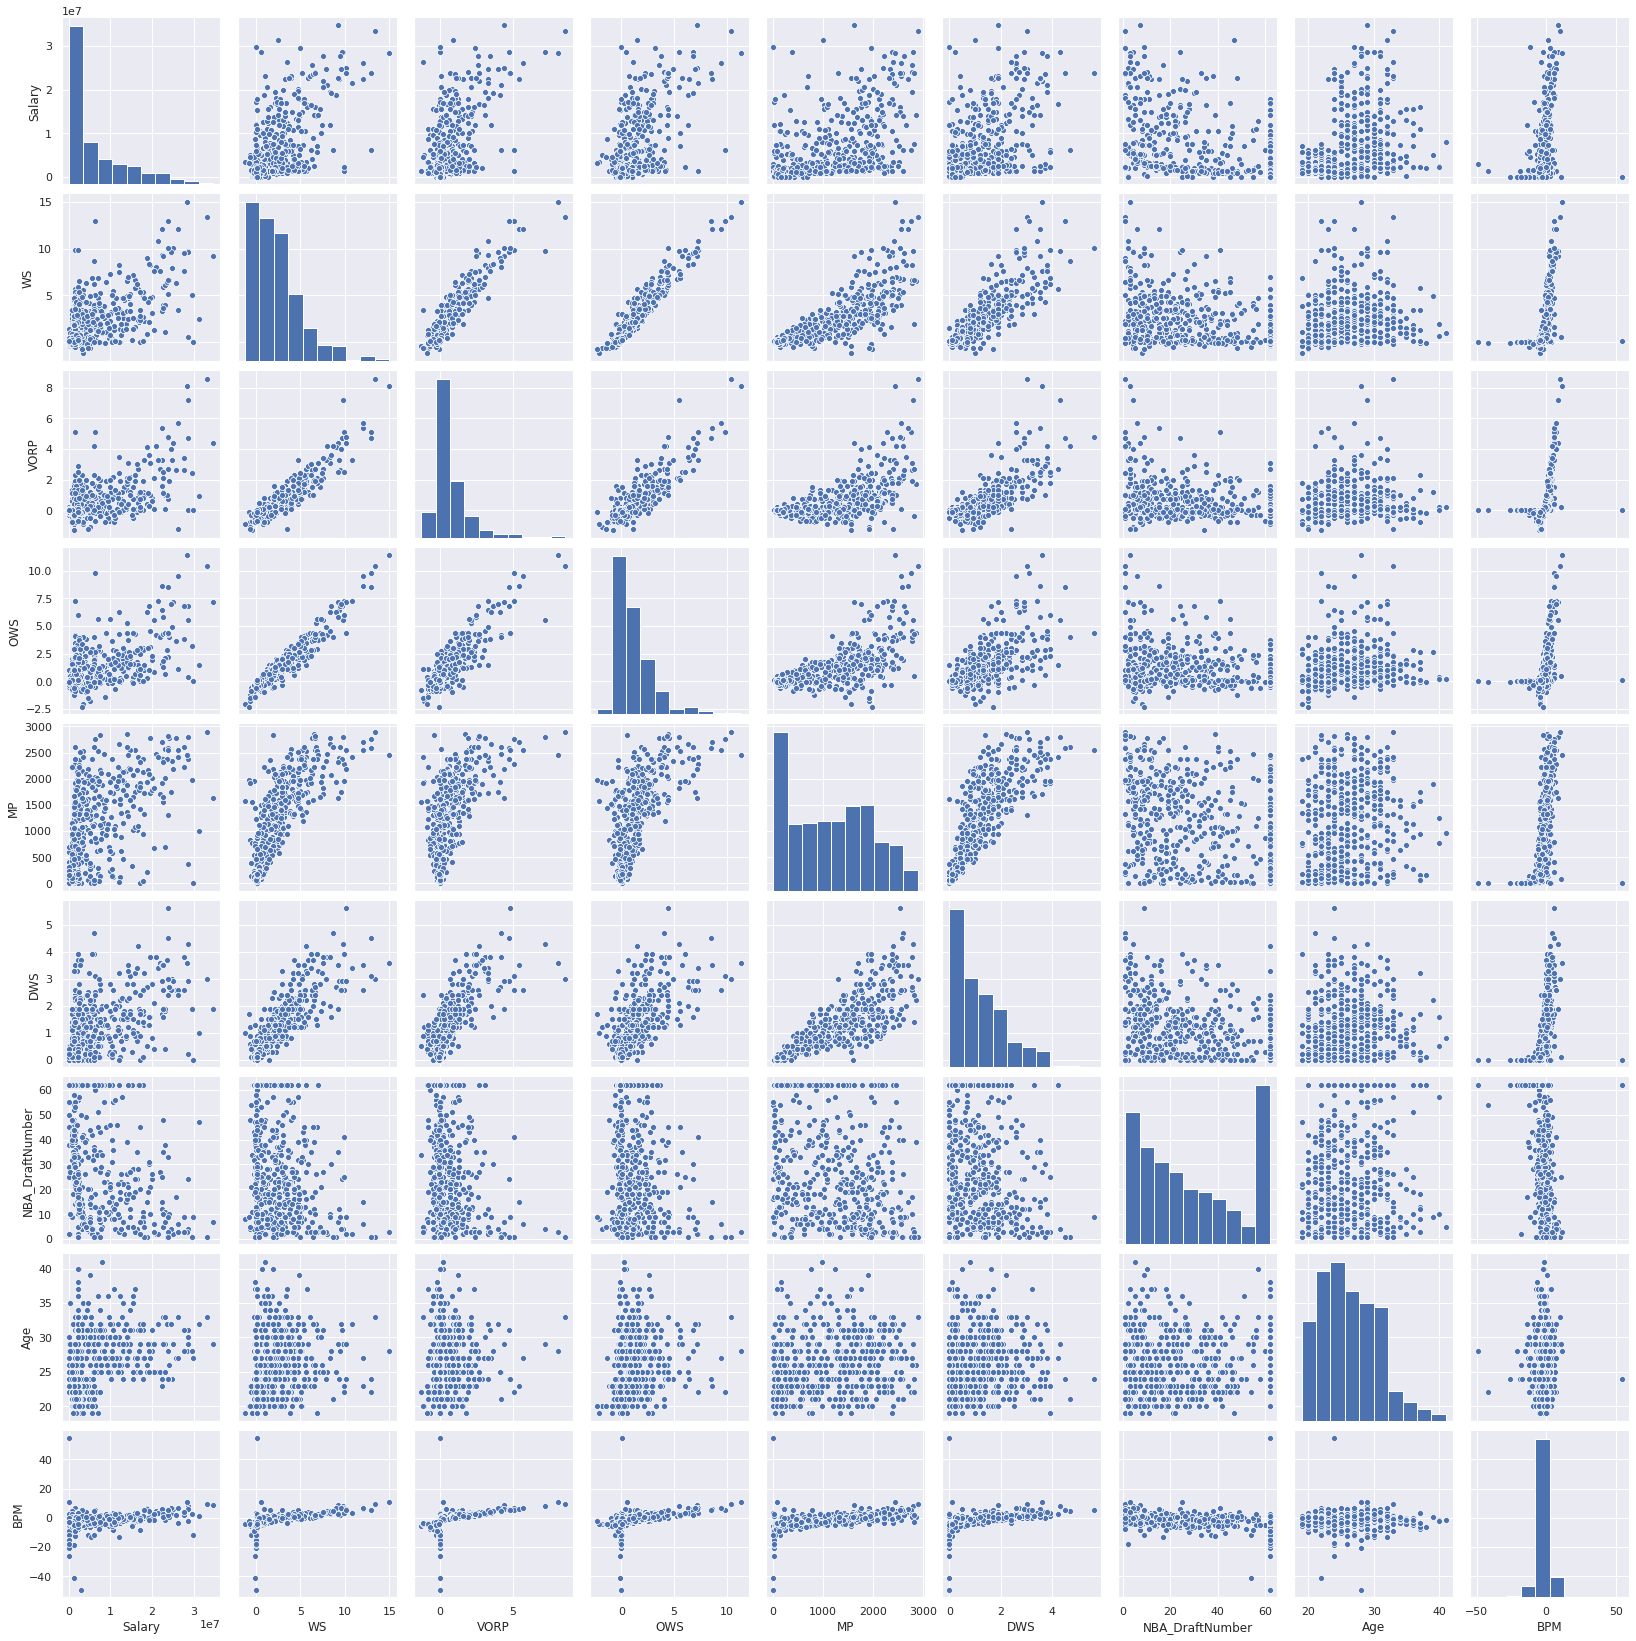

In [35]:
# Using scatter plots to detect the correlation value

variables = ['Salary', 'WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age', 'BPM']

sns.set()
sns.pairplot(df[variables], size = 2.5)
plt.show()

As we have 8 features now, which may contain multicollinearity that make the model inaccurate and cause overfitting. Therefore, the ***VIF*** value can be chosen to detect the ***multicollinearity***. If it is ***larger than 10***, we think that the multicollinearity is very strong and the feature should not be included.

In [36]:
# https://etav.github.io/python/vif_factor_python.html
# https://onlinecourses.science.psu.edu/stat501/node/347/

x = df[['WS', 'VORP', 'OWS', 'MP', 'DWS', 'NBA_DraftNumber', 'Age', 'BPM']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,4773.4,WS
1,8.3,VORP
2,1868.2,OWS
3,12.2,MP
4,893.2,DWS
5,3.3,NBA_DraftNumber
6,7.5,Age
7,1.5,BPM


As expected, the OWS, DWS, and WS have a high variance inflation factor because they "explain" the same meaning. Also, the Age, BPM, USG%, VORP, MP and PER also share the similar high VIF, so some of them should be discarded. Therefore, we choose 'NBA_DraftNumber', 'Age', 'WS', 'BPM' as our features for modelling.

In [37]:
x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,3.2,NBA_DraftNumber
1,5.4,Age
2,2.7,WS
3,1.5,BPM


***Root Mean Squrare Error*** is a measure of how far the predicted points away from the real points. Compared with MSE and MAE, RMSE can provide the same dimensionality with target variables, and the sqaure function can make the measurement more precise than MAE when comparing different models.

In [39]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [ ]:
# At first, we use multivariate linear regression to build our initial model. 
# Then we assume that our model does not cause overfitting or underfitting. 
# In order to accept or reject our hypothesis, we use cross validation to separate our data into training set and validation set (8:2). 
# Then we apply the bias/variance trade-off graph to see whether the assumption is true or not.

In [40]:
from sklearn.model_selection import train_test_split

x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Salary']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# Cross Validation

# Spliting dataset into three parts, for training, validation, and testing respectively.

x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)
print("the number of data for training:")
print(y_train.count())
print("the number of data for validation:")
print(y_val.count())
print("the number of data for testing:")
print(y_test.count())

the number of data for training:
Salary    291
dtype: int64
the number of data for validation:
Salary    97
dtype: int64
the number of data for testing:
Salary    97
dtype: int64


In [41]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

print(rmse_model(linear_regression, x_test, y_test))
print(linear_regression.coef_)
print(linear_regression.intercept_)

4508432.243951646
[[ -71799.85650873  478944.20584276 1505350.67144101  -28969.978771  ]]
[-7254368.84624032]


degree = 1, training RMSE = 5407757.28, validation RMSE = 6182715.55
degree = 2, training RMSE = 4885065.73, validation RMSE = 6033258.85
degree = 3, training RMSE = 4681446.45, validation RMSE = 6239619.83
degree = 4, training RMSE = 4272735.32, validation RMSE = 10301083.81
degree = 5, training RMSE = 3374339.16, validation RMSE = 119763074.21
degree = 6, training RMSE = 2203748.22, validation RMSE = 764858900.78
degree = 7, training RMSE = 892649.61, validation RMSE = 415068291151.75


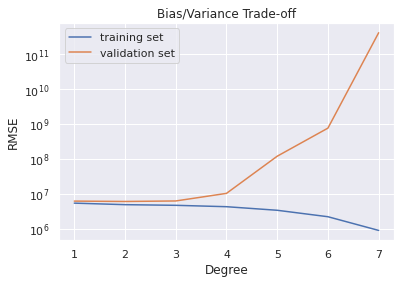

In [42]:
# Bias-Variance Trade-off

from sklearn.preprocessing import PolynomialFeatures

train_rmses = []
val_rmses = []
degrees = range(1,8)

for i in degrees:
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    
    # training RMSE
    y_train_pred = poly_reg.predict(x_train_poly)
    train_poly_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    train_rmses.append(train_poly_rmse)
    
    # validation RMSE
    x_val_poly = poly.fit_transform(x_val)
    y_val_pred = poly_reg.predict(x_val_poly)
    
    val_poly_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_rmses.append(val_poly_rmse)

    print('degree = %s, training RMSE = %.2f, validation RMSE = %.2f' % (i, train_poly_rmse, val_poly_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, train_rmses,label= 'training set')
ax.plot(degrees, val_rmses,label= 'validation set')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Bias/Variance Trade-off')  
plt.legend()
plt.show()

As it is shown on the Figure 5, when degree=1, both of training and validation set's RMSE are quite low. But when degree>=4, the difference between training set's RMSE and validation set's RMSE is obvious. Here we retain the null hypothesis that the 1nd-order polynomial model does not cause high-bias.

In [43]:
# RMSE for testing data

second_poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = second_poly.fit_transform(x_train)

second_reg = LinearRegression()
second_reg.fit(x_train_poly, y_train)

x_test_second_poly = second_poly.fit_transform(x_test)
y_test_pred = second_reg.predict(x_test_second_poly)

print(rmse_model(second_reg, x_test_second_poly, y_test))
print(second_reg.coef_)
print(second_reg.intercept_)

4136581.4303310057
[[-4.14637124e+05  4.93441473e+06 -2.28210378e+06 -4.58754805e+05
   1.44627259e+03  8.95955303e+03 -9.23160528e+03  2.36929111e+03
  -8.87674773e+04  1.23912801e+05  1.37063091e+04  4.83339384e+04
   1.98777225e+04 -6.83788651e+02]]
[-59198600.26031571]


There are 3 ways to solve overfiting. The first way is to increase the size of dataset, the second way is to choose a suitable model complexity, and the third way is to use regularization to reduce the value of coefficient. In this part, we focus on regularization and select degree=4 to test the effectiveness of these three methods.

The meaning of regularization can be considered as 'punishiment'. When the model is too complex, the values of coefficients are very large. So we introduce the l to make the coefficients smaller than before.

In [44]:
# At first, we calculate the RMSE before regularization.

poly = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly.fit_transform(x_train)

poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

x_test_poly = poly.fit_transform(x_test)
y_test_pred = poly_reg.predict(x_test_poly)

print(rmse_model(poly_reg, x_test_poly, y_test))

128255850.40654281


[7817013.184217174, 7528017.671819781, 7124891.623814047, 6910231.505622433, 6817935.198311485, 6816889.77286801, 6837096.1702843625, 6863858.844727358, 6935241.749741903, 7001350.273676512]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.61711e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.3109e-17): result may not be accurate.
  overwrite_a=True).T


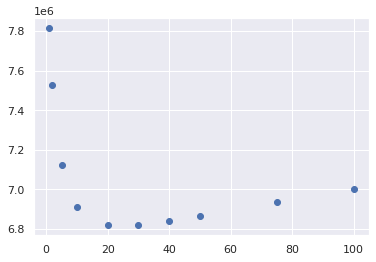

In [45]:
# Ridge

# https://blog.csdn.net/hzw19920329/article/details/77200475
# https://www.kaggle.com/sflender/comparing-lin-regression-ridge-lasso
# https://www.kaggle.com/junyingzhang2018/ridge-regression-score-0-119

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

rmse=[]
alpha=[1, 2, 5, 10, 20, 30, 40, 50, 75, 100]

for a in alpha:
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[6817935.198311485, 6814415.814008867, 6812996.082256478, 6813164.756328403, 6814553.196240526, 6816889.77286801, 6819970.534653715, 6823639.797455794, 6827776.978070727, 6832287.465800115, 6837096.1702843625, 6842142.878619342, 6847378.862823458, 6852764.3644557735, 6858266.70412431, 6863858.844727358, 6869518.286541176, 6875226.208909153, 6880966.797679514, 6886726.711529938]


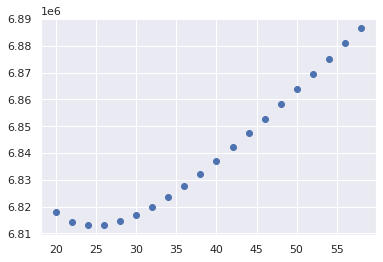

In [46]:
# Adjust alpha based on previous result

alpha=np.arange(20, 60, 2)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[6817935.198311485, 6817470.195418197, 6817032.348689549, 6816620.847937121, 6816234.911265609, 6815873.786098653, 6815536.746694335, 6815223.093026595, 6814932.150598948, 6814663.267076861, 6814415.814008867, 6814189.184488949, 6813982.792328062, 6813796.071377974, 6813628.474160128, 6813479.472278962, 6813348.555031804, 6813235.2272911705, 6813139.01168289, 6813059.445878032, 6812996.082256478, 6812948.487837887, 6812916.243910004, 6812898.944068766, 6812896.195145534, 6812907.616497664, 6812932.83972555, 6812971.506569599, 6813023.270448937, 6813087.79583595, 6813164.756328403, 6813253.836137735, 6813354.728984454, 6813467.137014452, 6813590.771665827, 6813725.3520272, 6813870.60687435, 6814026.27178165, 6814192.089894509, 6814367.812162703, 6814553.196240526, 6814748.006802291, 6814952.01553432, 6815164.999751384, 6815386.743015545, 6815617.035708355, 6815855.673038592, 6816102.456309483, 6816357.19204605, 6816619.69194833]


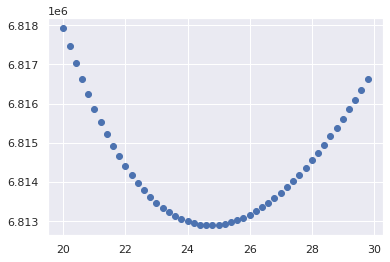

In [47]:
# Adjust alpha based on previous result

alpha=np.arange(20, 30, 0.2)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

In [48]:
# Use alpha=40.4 to predict the test data

ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=24.6))
ridge_model = ridge.fit(x_train, y_train)

predictions = ridge_model.predict(x_test)
print("Ridge RMSE is: " + str(rmse_model(ridge_model, x_test, y_test)))

Ridge RMSE is: 32093519.470217366


[6691949.3628798155, 6691949.365290635, 6691949.3893989995, 6691949.630482722, 6691952.041325871]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072697960466441.0, tolerance: 1614568832631.116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072697962093377.5, tolerance: 1614568832631.116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072697978362684.5, tolerance: 1614568832631.116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307269814

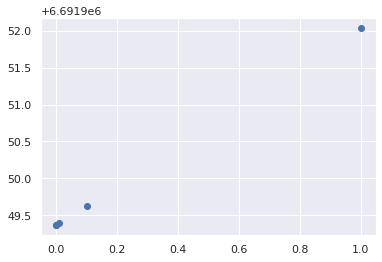

In [49]:
# Lasso

# https://www.kaggle.com/sflender/comparing-lin-regression-ridge-lasso

from sklearn.linear_model import Lasso

rmse=[]
alpha=[0.0001, 0.001, 0.01, 0.1, 1]

for a in alpha:
    lasso=make_pipeline(PolynomialFeatures(4), Lasso(alpha=a))
    lasso.fit(x_train, y_train)
    predict=lasso.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

In [50]:
lasso = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.0001))
lasso_model = lasso.fit(x_train, y_train)
predictions = lasso_model.predict(x_test)
print("RMSE in Testing : " + str(rmse_model(lasso_model, x_test, y_test)))

RMSE in Testing : 10261503.616564656


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072697960466441.0, tolerance: 1614568832631.116
  positive)


[6691951.268951078, 6691968.424277892, 6692139.806838639, 6693836.688870101, 6709234.924996466, 6783234.741187577]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072698983214757.0, tolerance: 1614568832631.116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072708186543200.5, tolerance: 1614568832631.116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072799920233739.5, tolerance: 1614568832631.116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307368798

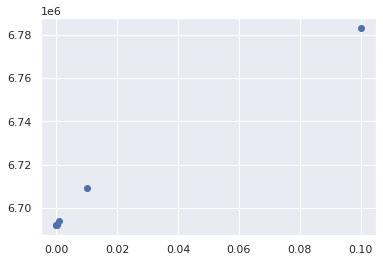

In [51]:
# ElasticNet

# https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions

from sklearn.linear_model import ElasticNet, ElasticNetCV

rmse=[]
alpha=[0.000001, 0.00001, 0.0001, 0.001,0.01,0.1]

for a in alpha:
    elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=a))
    elasticnet.fit(x_train, y_train)
    predict=elasticnet.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
                             
print(rmse)
plt.scatter(alpha, rmse)

In [52]:
elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=0.000001))
elasticnet_model = elasticnet.fit(x_train, y_train)
predictions = elasticnet_model.predict(x_test)
print("RMSE in Testing : " + str(rmse_model(elasticnet_model, x_test, y_test)))

RMSE in Testing : 10261504.744831782


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3072698983214757.0, tolerance: 1614568832631.116
  positive)


In [53]:
# Comparison

print("For testing dataset\n")

print("Linear RMSE is: " + str(rmse_model(linear_regression, x_test, y_test)))
print("2nd Polynomial RMSE is: " + str(rmse_model(second_reg, x_test_second_poly, y_test)))

print("\nFor 4th order polynomial (RMSE = 128255850.32699986 before regualarization)")
print("Ridge RMSE is: " + str(rmse_model(ridge_model, x_test, y_test)))
print("Lasso RMSE is: " + str(rmse_model(lasso_model, x_test, y_test)))
print("ElasticNet RMSE is: " + str(rmse_model(elasticnet_model, x_test, y_test)))

For testing dataset

Linear RMSE is: 4508432.243951646
2nd Polynomial RMSE is: 4136581.4303310057

For 4th order polynomial (RMSE = 128255850.32699986 before regualarization)
Ridge RMSE is: 32093519.470217366
Lasso RMSE is: 10261503.616564656
ElasticNet RMSE is: 10261504.744831782


In [54]:
data = np.array([['','Parameter','RMSE'],
                ['1st-order Poly',1,4508432.2],
                ['2nd-order Poly',2,4136581.4],
                ['4nd-order Poly',4,128255850.3],
                ['4nd-order Lasso','<0.0001',10261503.6],
                ['4nd-order Ridge',24.6,32093519.5],
                ['4nd-order ElasticNet','<0.0001',10261504.7]])
                
regression_comparison = pd.DataFrame(data=data[1:,1:],
                                      index=data[1:,0],
                                    columns=data[0,1:])
regression_comparison

,Parameter,RMSE
1st-order Poly,1,4508432.2
2nd-order Poly,2,4136581.4
4nd-order Poly,4,128255850.3
4nd-order Lasso,<0.0001,10261503.6
4nd-order Ridge,24.6,32093519.5
4nd-order ElasticNet,<0.0001,10261504.7


In [55]:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

my_ridge = Ridge(alpha = 24.6, normalize = True)
my_ridge.fit(x_train, y_train) 
#pd.Series(my_ridge.coef_,index = ['NBA_DraftNumber', 'Age', 'WS', 'BPM'])
my_ridge.coef_

array([[-5063.8823843 , 23745.62461498, 69180.1194312 , 14071.36231572]])

In [56]:
my_lasso = Lasso(alpha = 0.0001, normalize = True)
my_lasso.fit(x_train, y_train) 
my_lasso.coef_

array([ -71799.85643407,  478944.20547638, 1505350.67035793,
        -28969.97816668])

In [57]:
my_elasticnet = ElasticNet(alpha = 0.0001, normalize = True)
my_elasticnet.fit(x_train, y_train) 
my_elasticnet.coef_

array([ -71487.33915305,  473914.28999172, 1478049.57849672,
        -22200.94106611])

In [58]:
#https://www.zhihu.com/question/38121173

data = np.array([['','NBA_DraftNumber','Age', 'WS', 'BPM'],
                ['Ridge',-5063.8823843 , 23745.62461498, 69180.1194312 , 14071.36231572],
                ['Lasso',-71799.85643407,  478944.20547638, 1505350.67035793, -28969.97816668],
                ['ElasticNet',-71487.33915305,  473914.28999172, 1478049.57849672, -22200.94106611]])
                
regularization_comparison = pd.DataFrame(data=data[1:,1:],
                                      index=data[1:,0],
                                    columns=data[0,1:])
regularization_comparison

,NBA_DraftNumber,Age,WS,BPM
Ridge,-5063.8823843,23745.62461498,69180.1194312,14071.36231572
Lasso,-71799.85643407,478944.20547638,1505350.67035793,-28969.97816668
ElasticNet,-71487.33915305,473914.28999172,1478049.57849672,-22200.94106611


As it is shown on the Figure 5, when degree=1, both of training and validation set's RMSE are quite low. But when degree>=4, the difference between training set's RMSE and validation set's RMSE is obvious. Here we retain the null hypothesis that the 1nd-order polynomial model does not cause high-bias.


And the performance of different models is shown above, where 2nd-order polynomial regression performs the best. And when it comes to 4nd-order polynomial regression, it causes overfiting.


Different regularization methods perform differently. Focusing on coefficients and we can find that Ridge regularization drives parameters to smaller values. But if the multicollinearity exits, Lasso will turn its coefficients to 0, while Ridge will not erase any feature value. So if we want to do the feature selection, we can choose Lasso. But if we want to keep all features on the list, we prefer Ridge.


In all, although the effect of regularization is significant, it is much better to choose the correct parameters and features.

**Measure of Goodness: Accuracy Score and Confusion Matrix**

Accuracy Score is straight-forward, for it tells us the probability of the right answers that your model can predict. However, if we want to know the Accuracy Score of each target group, it is more suitable to use Confusion Matrix, which will show the comparison of predicted values and real values in each group.

In [59]:
# https://www.kaggle.com/pablovargas/naive-bayes-svm-spam-filtering
# for binary target variables

from sklearn import metrics

def confusion_matrix(model, x_test, y_test):
    model_confusion_test = metrics.confusion_matrix(y_test, model.predict(x_test))
    matrix = pd.DataFrame(data = model_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
                 index = ['Actual 0', 'Actual 1'])
    return matrix

**Selection of Model: KNN, SVM, Naïve Bayes, Decision Tree, Logistic Regression**

Five Models are selected to fit our dataset. Here we use KNN, SVM to fit the 'Binary' target variables, and use others to fit the 'Nominal' variables.

In [60]:
print(copy_data.columns)

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Binary', 'Nominal'],
      dtype='object')


In [61]:
df = DataFrame(copy_data,columns=['Binary', 'Nominal', 'Age','NBA_DraftNumber','MP', 'PER', 'TS', '3PAr', 
        'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%','STL%', 'BLK%', 
        'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 
        'DBPM', 'BPM', 'VORP'])

In [62]:
x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Binary']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)

**Comparison: Model Tuning, Learning Curve and Curse of Dimensionality**

The process of Model Tuning is similar to "Bias-Variance Trade-off", which is to find the balance that provide not only the high score of the training set, but also good ability to predict the testing set. After applying our models, it is essential to use the model tuning techniques to find the best parameters that fit our dataset.

Learning Curve is the process to see the change of correctness within the quantity of data set. It is also a good way to overcome the adverse impact of overfitting, for a big-size dataset can make a complex model performs well than a small-size dataset.

Curse of Dimensionality is one of the main reasons of overfitting. If the number of dimensions is similar to the amount of data, each or several samples may form one class, which may make the traing model performs well in the training set, but losing its ability to predict the testing set at the same time.

In [63]:
# Model Tuning

# 5-fold cross validation

from sklearn.model_selection import KFold, cross_val_score

def rmse_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_model.values)
    predictions = model.predict(x_test)
    rmse= np.sqrt(-cross_val_score(model, x_model.values, y_model, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [64]:
# How to find K?

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

train_scores = []
validation_scores = []

x_model_values = x_model.values
y_model_values = y_model.values

# 5-fold cross validation

kfold = KFold(5, shuffle=True, random_state=42)

for i in range(1,20):
    knn = KNeighborsClassifier(i)
    
    tr_scores = []
    va_scores = []
    
    for a, b in kfold.split(x_model_values):

        x_train_fold, y_train_fold = x_model_values[a], y_model_values[a]
        x_val_fold, y_val_fold = x_model_values[b], y_model_values[b]
        
        knn.fit(x_train_fold, y_train_fold.ravel())
        
        va_scores.append(knn.score(x_val_fold, y_val_fold))
        tr_scores.append(knn.score(x_train_fold, y_train_fold))
        
    validation_scores.append(np.mean(va_scores))
    train_scores.append(np.mean(tr_scores))

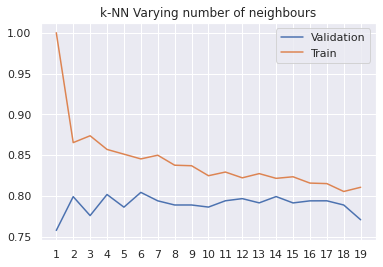

In [65]:
plt.title('k-NN Varying number of neighbours')
plt.plot(range(1,20),validation_scores,label="Validation")
plt.plot(range(1,20),train_scores,label="Train")
plt.legend()
plt.xticks(range(1,20))
plt.show()

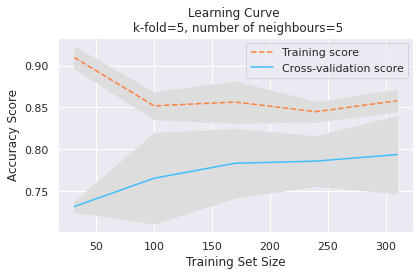

In [66]:
# Learning Curve

# How KNN algorithm performs in both small-size data and big-size data 

# choose an acceptable color
# https://www.spycolor.com/ff8040

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(KNeighborsClassifier(5), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        n_jobs=-1, 
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve \n k-fold=5, number of neighbours=5")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [67]:
# curse of dimensionality

# one or two features are simple, but it cannot recognize and divide our categories. more features means
# more evidence in different dimensions, but it could cause overfitting.

X = df[[ 'Age', 'NBA_DraftNumber','MP', 'PER', '3PAr',
        'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%','STL%', 'BLK%', 
        'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 
        'DBPM', 'BPM', 'VORP']]
Y = df[['Binary']]

X_model, X_test, Y_model, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_model, Y_model, test_size=0.25, random_state=1)

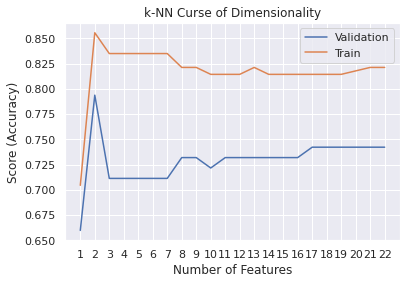

In [68]:
# [:, :2]extract columns

# convert[[1],[2],[3],...] to [1,2,3,4,0]
# x_train_values_list = np.array(x_train_values).tolist() 

'''
y_train_value = [j for i in y_train_values for j in i] - delete sublists to just one list

dimensionality = []
for i in range(10):

a = [item[:, :2] for item in list(x_train_values)]
print(a)
'''

d_train = []
d_val = []

X_train_values = X_train.values
Y_train_values = Y_train.values
X_val_values = X_val.values
Y_val_values = Y_val.values

for i in range(1,23):
    
    X_train_value = X_train_values[:,:i].tolist() #convert dataframe
    X_val_value = X_val_values[:,:i].tolist()
    
    knn = KNeighborsClassifier(5)
    Knn = knn.fit(X_train_value, Y_train_values.ravel())

    d_train.append(Knn.score(X_train_value, Y_train_values))
    d_val.append(Knn.score(X_val_value, Y_val_values))

plt.title('k-NN Curse of Dimensionality')
plt.plot(range(1,23),d_val,label="Validation")
plt.plot(range(1,23),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,23))
plt.show()

In [69]:
# The best result is captured at k = 5 hence it is used for the final model.

#Setup a knn classifier with k neighbors

kfold = KFold(5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(5)

for m,n in kfold.split(x_model_values):
        
        x_train_fold, y_train_fold = x_model_values[m], y_model_values[m]
        
        Knn = knn.fit(x_train_fold, y_train_fold.ravel())

print('When k=5, the testing score(accuracy) is: ')
print(Knn.score(x_test,y_test))

When k=5, the testing score(accuracy) is: 
0.865979381443299


In [70]:
confusion_matrix(Knn, x_test, y_test)

,Predicted 0,Predicted 1
Actual 0,76,4
Actual 1,9,8


In [71]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

classifier = SVC(gamma = 'auto')
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))

0.9862542955326461
0.7731958762886598


[0.7731958762886598, 0.7938144329896907, 0.7731958762886598, 0.7525773195876289, 0.7731958762886598, 0.7731958762886598, 0.7731958762886598, 0.7835051546391752, 0.7731958762886598]


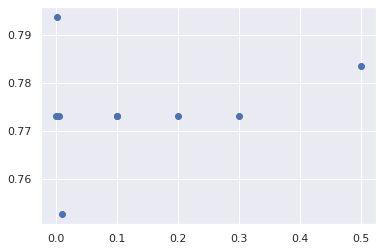

In [72]:
#Tuning

# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
# https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

#from sklearn.model_selection import GridSearchCV

#parameters = {"estimator__gamma":[0.0001, 0.001, 0.01, 0.3, 0.5, 0.1, 2, 5, 10, 100]}
#grid_search = GridSearchCV(svm_model, param_grid=parameters)
#grid_search.fit(x_train, y_train)
#print(grid_search.best_score_)
#print(grid_search.best_params_)

accuracy=[]
gamma=[0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5, 0.1]

for a in gamma:
    classifier = SVC(C=1, 
        kernel='rbf', 
        degree=2, 
        gamma=a, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(gamma, accuracy)

[0.7731958762886598, 0.7938144329896907, 0.7422680412371134, 0.7938144329896907, 0.8041237113402062, 0.7938144329896907, 0.7628865979381443, 0.7835051546391752, 0.7835051546391752, 0.7835051546391752, 0.7731958762886598, 0.7628865979381443, 0.7525773195876289, 0.7422680412371134, 0.7731958762886598, 0.7628865979381443, 0.7525773195876289]


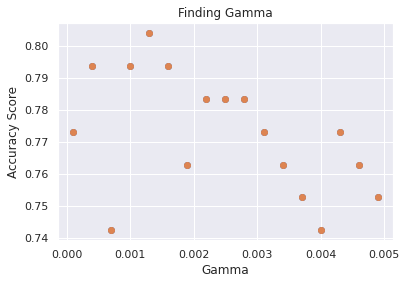

In [73]:
gamma=np.arange(0.0001, 0.005, 0.0003) 
accuracy=[]

for a in gamma:
    classifier = SVC(C=1, 
        kernel='rbf', 
        degree=2, 
        gamma=a, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(gamma, accuracy)
plt.scatter(gamma, accuracy)
plt.title("Finding Gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy Score")
plt.show()

The use of gamma is similar to k in KNN. The higher the gamma value it tries to exactly fit the training data set. And if the gamma value is too high, it will cause overfitting.


The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.

[0.8041237113402062, 0.7835051546391752, 0.7835051546391752, 0.7835051546391752, 0.7628865979381443, 0.7628865979381443, 0.7525773195876289, 0.7422680412371134, 0.7422680412371134]


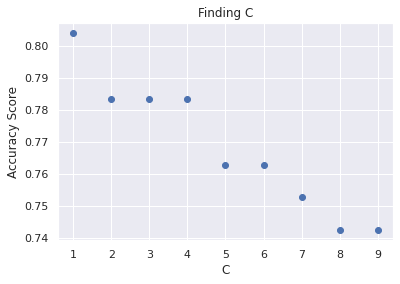

In [75]:
accuracy=[]
C=np.arange(1,10,1) 

for a in C:
    classifier = SVC(C=a, 
        kernel='rbf', 
        degree=2, 
        gamma=0.0013, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None, 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(C, accuracy)
plt.title("Finding C")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.show()

The Regularization parameter tells the SVM optimization how much you want to avoid misclassifying each training example.

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

In [76]:
classifier = SVC(C=1, # Regularization parameter
        kernel='rbf', # kernel type, rbf working fine here
        degree=2, # default value
        gamma=0.0013, # kernel coefficient
        coef0=1, # change to 1 from default value of 0.0
        shrinking=True, # using shrinking heuristics
        tol=0.5, # stopping criterion tolerance 
        probability=False, # no need to enable probability estimates
        cache_size=200, # 200 MB cache size
        class_weight=None, # all classes are treated equally 
        verbose=False, # print the logs 
        max_iter=-1, # no limit, let it run
        decision_function_shape=None, # will use one vs rest explicitly 
        random_state=None)
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))

0.8006872852233677
0.8041237113402062


In [77]:
print(svm_model.score(x_test,y_test))

0.8969072164948454


In [78]:
# Confusion Matrix

confusion_matrix(svm_model, x_test, y_test)

,Predicted 0,Predicted 1
Actual 0,80,0
Actual 1,10,7


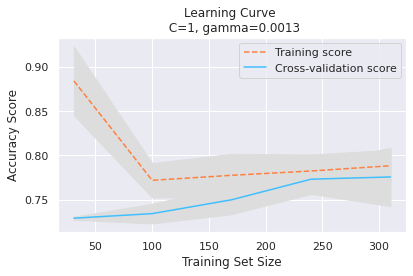

In [79]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(classifier, n_jobs=1), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve \n C=1, gamma=0.0013")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


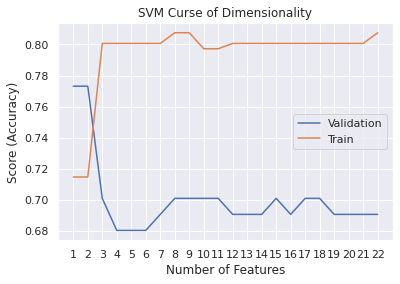

In [80]:
# curse of dimensionality

# one or two features are simple, but it cannot recognize and divide our categories. more features means
# more evidence in different dimensions, but it could cause overfitting.

# https://thispointer.com/select-rows-columns-by-name-or-index-in-dataframe-using-loc-iloc-python-pandas/

d_train = []
d_val = []

for i in range(1,23):
    
    X_train_index = X_train.iloc[: , 0:i]
    X_val_index = X_val.iloc[: , 0:i]
    
    classifier = SVC(C=1, # Regularization parameter
                    kernel='rbf', # kernel type, rbf working fine here
                    degree=2, # default value
                    gamma=0.0001, # kernel coefficient
                    coef0=1, # change to 1 from default value of 0.0
                    shrinking=True, # using shrinking heuristics
                    tol=0.5, # stopping criterion tolerance 
                    probability=False, # no need to enable probability estimates
                    cache_size=200, # 200 MB cache size
                    class_weight=None, # all classes are treated equally 
                    verbose=False, # print the logs 
                    max_iter=-1, # no limit, let it run
                    decision_function_shape=None, # will use one vs rest explicitly 
                    random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(X_train_index, Y_train)

    d_train.append(svm_model.score(X_train_index, Y_train))
    d_val.append(svm_model.score(X_val_index, Y_val))
plt.title('SVM Curse of Dimensionality')
plt.plot(range(1,23),d_val,label="Validation")
plt.plot(range(1,23),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,23))
plt.show()

In ***Naive Bayes***, we assume that the features are independent from each other. We can try non-binary target variables.

In [81]:
# NB assumes that the features themselves are not correlated to each other. Therefore, if the collinearity of our features are low, the model will perform better.

x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Nominal']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)

In [83]:
# https://medium.com/machine-learning-101/chapter-1-supervised-learning-and-naive-bayes-classification-part-1-theory-8b9e361897d5
# https://blog.csdn.net/li8zi8fa/article/details/76176597
# GaussianNB,MultinomialNB, BernoulliNB

# http://www.cnblogs.com/lesliexong/p/6907642.html

# Gaussian is for continous features

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
nb_model = gaussian.fit(x_train, y_train.values.ravel())

print(nb_model.score(x_train,y_train))

0.6563573883161512


In [84]:
train_score = []
val_score = []
a = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1]

#for i in np.arange(1,20):
for i in a:
    gaussian = GaussianNB(priors=None, var_smoothing=i)
    nb_model = gaussian.fit(x_train, y_train.values.ravel())
    train_score.append(nb_model.score(x_train, y_train))
    val_score.append(nb_model.score(x_val, y_val))

Text(0, 0.5, 'Accuracy')

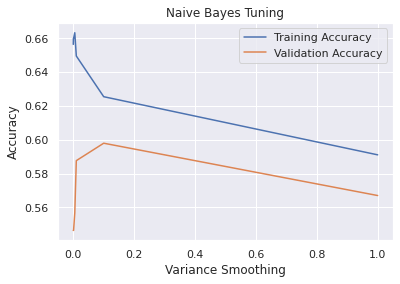

In [85]:
plt.plot(a,train_score)
plt.plot(a,val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Naive Bayes Tuning')
plt.xlabel('Variance Smoothing')
plt.ylabel('Accuracy')

In [86]:
gaussian = GaussianNB(priors=None, var_smoothing=0.1)
nb_model = gaussian.fit(x_train, y_train.values.ravel())

print(nb_model.score(x_test, y_test))

0.6701030927835051


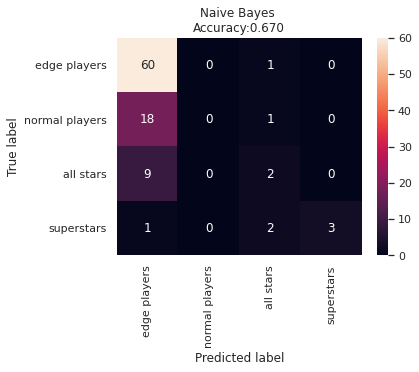

In [87]:
# https://www.kaggle.com/diegosch/classifier-evaluation-using-confusion-matrix

# 0 - edge players
# 1 - normal players
# 2 - all stars
# 3 - superstars

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

y_predict = nb_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

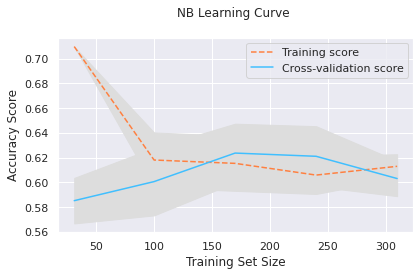

In [88]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(GaussianNB(priors=None, var_smoothing=0.1)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("NB Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

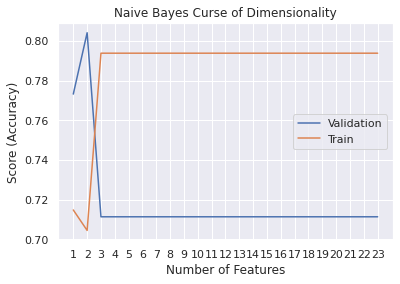

In [89]:
d_train = []
d_val = []

for i in range(1,24):
    
    X_train_index = X_train.iloc[: , 0:i]
    X_val_index = X_val.iloc[: , 0:i]
    
    classifier = GaussianNB(priors=None, var_smoothing=0.1)
    nb_model = gaussian.fit(X_train_index, Y_train.values.ravel())

    d_train.append(nb_model.score(X_train_index, Y_train))
    d_val.append(nb_model.score(X_val_index, Y_val))
plt.title('Naive Bayes Curse of Dimensionality')
plt.plot(range(1,24),d_val,label="Validation")
plt.plot(range(1,24),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,24))
plt.show()

***Decision Tree***

There are three ways to build a decision tree. CART is for binary target variables, ID3 is for nomial attributes, and C4.5 can be applied for continous features, whcih is the most suitable in our case.

In [90]:
# https://blog.csdn.net/app_12062011/article/details/52136117

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
print(decision_tree_model.score(x_train,y_train))
print(decision_tree_model.score(x_val,y_val))

1.0
0.4948453608247423


Text(0.5, 1.0, 'Feature Importance')

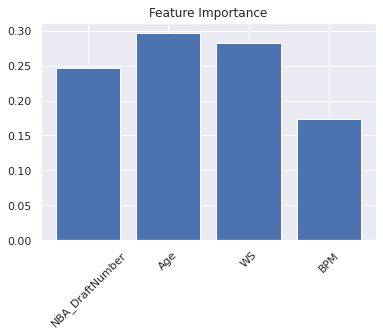

In [91]:
plt.bar(range(len(x_train.columns.values)), decision_tree_model.feature_importances_)
plt.xticks(range(len(x_train.columns.values)),x_train.columns.values, rotation= 45)
plt.title('Feature Importance')

Text(0, 0.5, 'Accuracy')

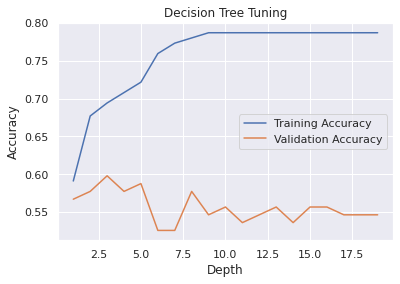

In [92]:
#Model Tuning

#https://www.kaggle.com/drgilermo/stephen-curry-s-decision-tree

train_score = []
val_score = []
for depth in np.arange(1,20):
    decision_tree = tree.DecisionTreeClassifier(max_depth = depth,min_samples_leaf = 5)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,20),train_score)
plt.plot(np.arange(1,20),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

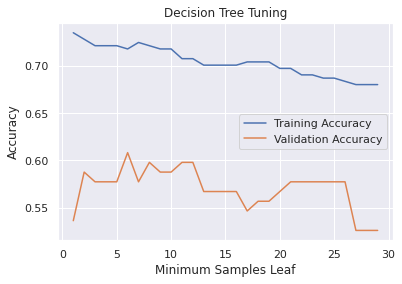

In [93]:
train_score = []
val_score = []
for leaf in np.arange(1,30):
    decision_tree = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = leaf)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,30),train_score)
plt.plot(np.arange(1,30),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Minimum Samples Leaf')
plt.ylabel('Accuracy')

In [94]:
my_decision_tree_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 6)
my_decision_tree_model.fit(x_train, y_train)
print(my_decision_tree_model.score(x_train,y_train))
print(my_decision_tree_model.score(x_val,y_val))

0.718213058419244
0.6082474226804123


In [95]:
print(my_decision_tree_model.score(x_test,y_test))

0.6907216494845361


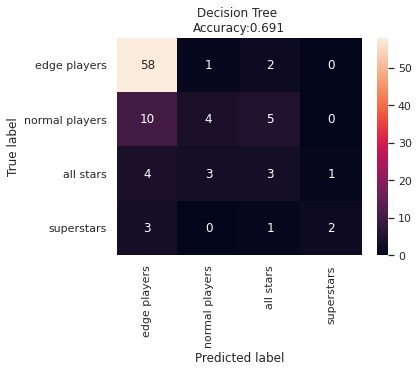

In [96]:
y_predict = my_decision_tree_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

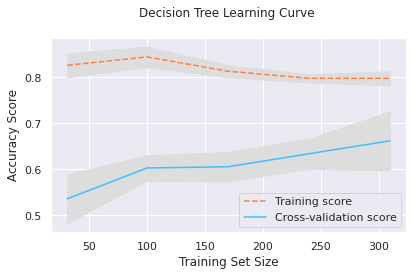

In [97]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 6)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Decision Tree Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

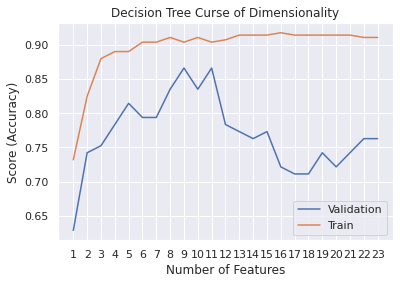

In [98]:
# Curse of Dimensionality

d_train = []
d_val = []

for i in range(1,24):
    
    X_train_index = X_train.iloc[: , 0:i]
    X_val_index = X_val.iloc[: , 0:i]
    
    classifier = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 6)
    dt_model = classifier.fit(X_train_index, Y_train.values.ravel())

    d_train.append(dt_model.score(X_train_index, Y_train))
    d_val.append(dt_model.score(X_val_index, Y_val))
plt.title('Decision Tree Curse of Dimensionality')
plt.plot(range(1,24),d_val,label="Validation")
plt.plot(range(1,24),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,24))
plt.show()

In [99]:
# logistic regression (LR)

#https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train.values.ravel())

print(logistic_model.score(x_train,y_train))
print(logistic_model.score(x_val,y_val))

0.6460481099656358
0.5773195876288659


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Text(0, 0.5, 'Accuracy')

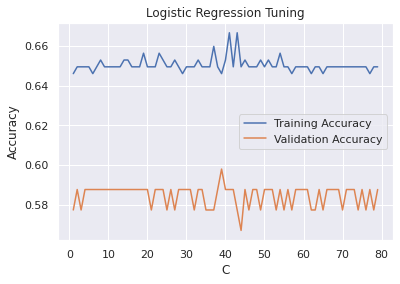

In [100]:
#https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

train_score = []
val_score=[]

for i in np.arange(1,80):
    
    logistic_model = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    
    logistic_model.fit(x_train,y_train.values.ravel()) 
    
    train_score.append(logistic_model.score(x_train, y_train))
    val_score.append(logistic_model.score(x_val,y_val))

    
plt.plot(np.arange(1,80),train_score)
plt.plot(np.arange(1,80),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Logistic Regression Tuning')
plt.xlabel('C')
plt.ylabel('Accuracy')

In [101]:
my_logistic_regression_model = LogisticRegression(penalty = 'l2', C = 50, random_state = 0)
my_logistic_regression_model.fit(x_train, y_train)
print(my_logistic_regression_model.score(x_train,y_train))
print(my_logistic_regression_model.score(x_val,y_val))

0.6494845360824743
0.5876288659793815


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [102]:
print(my_logistic_regression_model.score(x_test,y_test))

0.6597938144329897


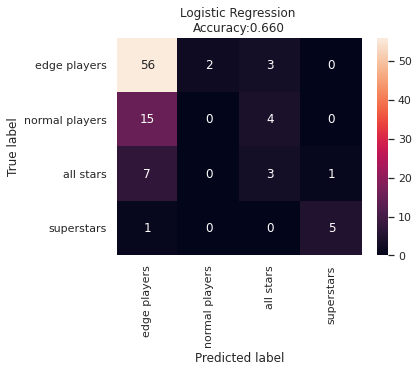

In [103]:
y_predict = my_logistic_regression_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

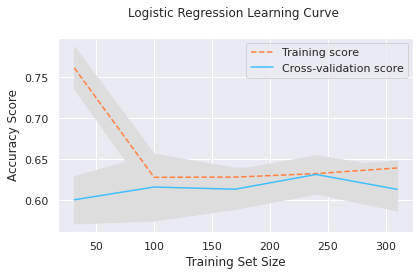

In [104]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(LogisticRegression(penalty = 'l2', C = 50, random_state = 0)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Logistic Regression Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


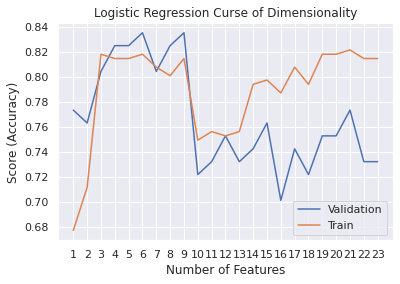

In [105]:
# Curse of Dimensionality

d_train = []
d_val = []

for i in range(1,24):
    
    X_train_index = X_train.iloc[: , 0:i]
    X_val_index = X_val.iloc[: , 0:i]
    
    classifier = LogisticRegression(penalty = 'l2', C = 50, random_state = 0)
    lr_model = classifier.fit(X_train_index, Y_train.values.ravel())

    d_train.append(lr_model.score(X_train_index, Y_train))
    d_val.append(lr_model.score(X_val_index, Y_val))
plt.title('Logistic Regression Curse of Dimensionality')
plt.plot(range(1,24),d_val,label="Validation")
plt.plot(range(1,24),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,24))
plt.show()

Through Model Tuning, Learning Curve, Curse of Dimensionality, and Confusion Matrix, we can get some knowledge about models' characteristics.

Firstly, model tuning is quite silimar with Bias-Variance Trade-off. The most suitable point is not the highest point in training set, but a balanced point which performs "not so bad" in both training and validation sets. However, the values of some models' parameters are very large, while others are quite small, such as Naive Bayes, which should be paid attention to.

Secondly, all models share the similar trends in the Learning Curve. When the size of training size is small, the score of training set is very high, but the score of vaidation set is very low, which causes overfitting. As the increase of data size, the score of training set becomes lower, and the validation set's score becomes higher, which means that the distance between these two groups are narrowing. However, as the size of this dataset only reaches 300, it cannot make sure that if the size is absolutly large (more than 10 thousands), how well will the curves perform.

Thridly, different models have different sensitivities to dimensionality. In our models, the curse of dimensionality is obvious in SVM, Naive Bayes, and Logistic Regression, where the high-dimensional features cause overfiting. While in other models, maybe it is because of the number of features are not enough, the "curse" does not appear. Lastly, Confusion Matrix tells us the performance on different target groups. For example, SVM does better in predicting label "0", while KNN performs better in predicting label "1". The similar phenomenon happens in another comparison, which can be touted as an important way to see the details of our models' prediction.

# Recommendations & Discussions

## Recommendations

* What are the most important 4 features that influence the salary?

*Through our modelling process, the most important 4 features are draft number, age, WS, and BPM.*


* What are the most suitable regression and classification models to predict players’ salaries? And how do the models work?

*The most suitable regression model is 2nd-order polynomial regression, which has the RMSE of about 4.1m. The most suitable binary classification model is SVM, taking the accuracy score of 0.896. Decision Tree model performs the best in Nominal target classification, with 0.691 accuracy score.*


* What recommendations can be made?

Firstly, through our exploratory analysis and modelling process, the difference between salaries of overseas and USA players are not significant, but the number of USA players are almost 3 times more than that of overseas players. This difference can be an opportunity to recruit more overseas players from other countries for the promotion.

Secondly, the correlations between players and their stats are not so strong, which means that there are the situations that players are overpaid or underpaid. In fact, this phenomenon is quite popular in the real NBA market. This should be noticed by the teams' managers. 

## Discussions

In this mini-project there are some technical limitations, such as normalization methods, model selections and stacking skills.

From Andrew Ng's Open Course, Normalization can change the big-value-features into a small-value one, which may make the lost function more accurate. And maybe that is the reason why my model's RMSE reachs over million. But I have not applied it because I think this will affect the real data's meaning, and also I think it is meaningless because our RMSE is a relative value, not an absolute one.

Model selection is important. At the beggining of this report, we planned to apply other advanced models, such as random forests, ADBoost, and so on. However, it is the mathematical concepts that let me realize that it is meaningless to apply them if I cannot understand the basic algorithm behind them. Therefore, I select Decision Tree by reading the slides, and select Logistic Regression by watching Andrew Ng's videos. Although I cannot apply these models this time, I believe I will understand them in the nearing future.

Also, multiple regression is the one that I cannot solve in programming language, because I cannot find any example in others' work. Similarly, within my ability, stacking skills is not approachable yet. But I believe that I will get them done in the future.

## Reference

Di, H. (2018). Value Creation: Comparative Netnographic Study of Two NBA Online Communities.

Narayanan, A., Shi, E., & Rubinstein, B. I. (2011, July). Link prediction by de-anonymization: How we won the kaggle social network challenge. In Neural Networks (IJCNN), The 2011 International Joint Conference on (pp. 1825-1834). IEEE.

Rosen, J., Arcidiacono, P., & Kimbrough, K. (2016). Determining NBA Free Agent Salary from Player Performance.

*You've made it to the end, thank you!*